# Instructions

Travail individuel à réaliser par chaque étudiant. Chaque fichier devra ensuite être rassemblé par groupe dans le premier dépôt Git de l'année universitaire, dans un nouveau dossier nommé <code>Computer Vision</code>.

Le nom du fichier doit être le prénom de l'étudiant écrit en minuscules. Par exemple, si l'étudiant s'appelle BOB Toto, le fichier doit être nommé toto.ipynb.

# Détails de l'étudiant
### Nom(s)  : RATODISON
### Prénom(s) :Herimanana Léonel 
### Classe : IGGLIA4

# Vision par Ordinateur avec Keras/TensorFlow : Un Notebook Pratique et Conceptuel

Ce notebook a pour objectif de vous guider pas à pas dans la création et l'analyse d'un modèle de réseau de neurones convolutif (CNN) appliqué au jeu de données CIFAR-10. Chaque étape est accompagnée d'explications pratiques ainsi que de questions conceptuelles pour renforcer votre compréhension des enjeux théoriques et pratiques de la vision par ordinateur.

## Étape 1 : Introduction et Configuration de l'Environnement

Dans cette étape, nous allons configurer notre environnement de travail et importer les bibliothèques indispensables pour le deep learning et la manipulation de données. Nous vérifions également la version de TensorFlow pour nous assurer que tout fonctionne correctement.

### Explication Pratique
La bonne configuration de l'environnement est cruciale pour garantir la reproductibilité et la stabilité de vos expériences. En particulier, les versions des bibliothèques peuvent influencer le comportement du modèle et sa performance, d'où l'importance de vérifier et documenter ces versions dès le début.

In [1]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print('Version de TensorFlow :', tf.__version__)

Version de TensorFlow : 2.10.0


### Question  1

**Q1 :** Pourquoi est-il essentiel de vérifier la configuration de l'environnement (versions des bibliothèques, dépendances, etc.) avant de développer un modèle de deep learning ?

_Répondez dans une nouvelle cellule Markdown._

Une configuration de l'environnement est essentielle pour garantir la stabilité et la reproductibilité des expériences. Les versions des bibliothèques peuvent affecter le comportement et la performance des modèles, ce qui rend leur vérification et leur documentation indispensables dès le début du projet.

## Étape 2 : Chargement et Prétraitement des Données

Nous allons charger le jeu de données CIFAR-10, composé de 60 000 images couleur réparties en 10 classes. Dans cette étape, nous normalisons les valeurs des pixels afin qu'elles soient comprises entre 0 et 1, et nous transformons les étiquettes en format one-hot pour faciliter le processus de classification.

### Explication Pratique
La normalisation aide à stabiliser et accélérer l'entraînement du modèle en assurant que les valeurs d'entrée ont une échelle comparable. Le one-hot encoding évite que le modèle interprète les étiquettes comme des valeurs numériques ordonnées, ce qui est essentiel pour les problèmes de classification multi-classes.

In [ ]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normaliser les valeurs des pixels (entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir les vecteurs de classes en matrices binaires (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Forme des données d'entrainement :", x_train.shape)
print("Forme des étiquettes d'entraînement :", y_train.shape)

   163840/170498071 [..............................] - ETA: 1:10:01

### Question 2

**Q2 :** Expliquez comment la normalisation des pixels et le one-hot encoding des étiquettes contribuent chacun à la stabilité et à l'efficacité de l'entraînement d'un modèle de deep learning.

_Répondez dans une nouvelle cellule Markdown._

a-Normalisation des pixels (Mise à l’échelle entre 0 et 1)

 Stabilité de l’apprentissage : En réduisant la plage des valeurs des pixels entre 0 et 1, on empêche des écarts trop importants entre les entrées, ce qui évite des mises à jour instables des poids du modèle.
Accélération de la convergence : Une échelle uniforme aide à optimiser la descente de gradient, permettant au modèle d’apprendre plus rapidement.
Meilleure performance : En évitant des valeurs extrêmes, le modèle est moins sujet à des explosions ou à des disparitions de gradients, ce qui améliore sa capacité d’apprentissage.

b-One-hot encoding des étiquettes
Évite une mauvaise interprétation des classes : Si les classes étaient représentées par des nombres entiers (ex: 0 à 9), le modèle pourrait interpréter ces valeurs comme une hiérarchie (ex: 9 > 2), ce qui est faux dans une classification multi-classes.
Facilite l’apprentissage : Les réseaux de neurones utilisent souvent une activation softmax en sortie, qui fonctionne mieux avec une représentation one-hot pour calculer les probabilités de chaque classe.
avorise une meilleure adaptation du réseau

## Étape 3 : Exploration et Visualisation des Données

Avant de construire le modèle, il est important d'explorer et de visualiser les données. Nous affichons ainsi un échantillon d'images du jeu de données pour mieux comprendre leur contenu et la distribution des classes.

### Explication Pratique
La visualisation des données permet d'identifier d'éventuelles anomalies, comme des classes sous-représentées ou des images bruitées, et de décider si des techniques d'augmentation de données ou de prétraitement supplémentaires sont nécessaires.

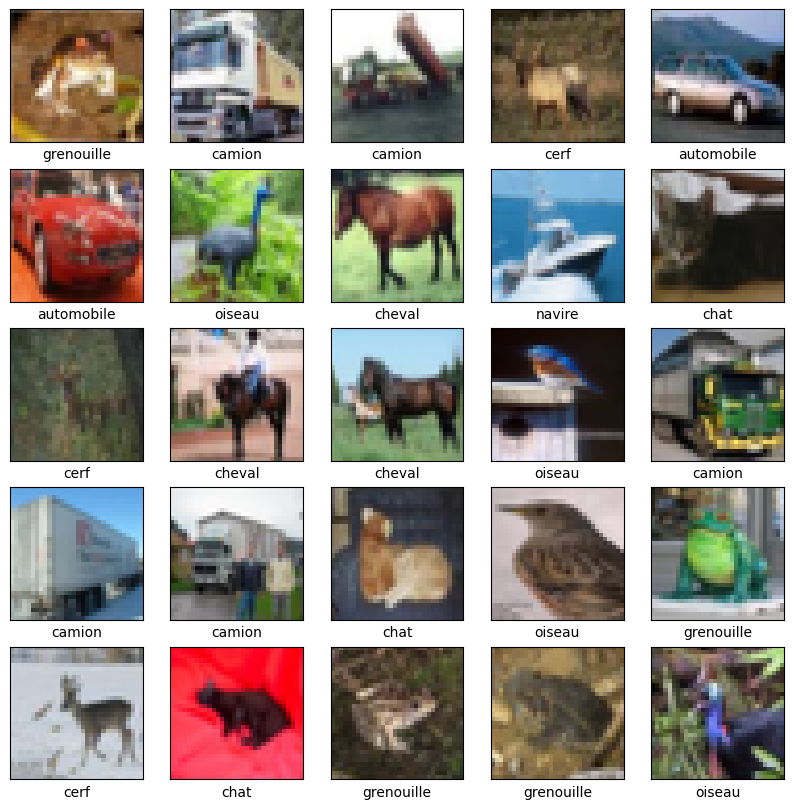

In [3]:
# Afficher quelques images du jeu de données d'entraînement
noms_classes = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'navire', 'camion']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(noms_classes[y_train[i].argmax()])
plt.show()

### Question 3

**Q3 :** D'après la visualisation, discutez de l'impact potentiel d'une distribution inégale des classes ou de la présence d'images de mauvaise qualité sur la performance d'un modèle de classification. Quelles stratégies pourraient être mises en place pour pallier ces problèmes ?

_Répondez dans une nouvelle cellule Markdown._

Pour pallier ces problèmes :

Gérer le déséquilibre des classes : sur-échantillonnage des classes minoritaires (ajouter des copies d’images sous-représentées), pondération des classes dans la fonction de perte, ou augmentation des données.

Améliorer la qualité des données : filtrer les images bruitées et utiliser l’augmentation de données pour rendre le modèle plus robuste.

Utiliser un CNN : les couches de convolution extraient des caractéristiques pertinentes malgré les variations d’images, le pooling réduit la sensibilité aux transformations, et le dropout prévient l’overfitting en rendant le modèle plus généraliste.

## Étape 4 : Construction du Modèle CNN

Nous allons construire un réseau de neurones convolutif (CNN) pour extraire des caractéristiques hiérarchiques des images. Ce modèle se compose de plusieurs blocs de convolution suivis de couches de pooling et se termine par des couches entièrement connectées pour la classification.

### Explication Pratique
Les couches de convolution permettent au modèle de détecter des motifs locaux (comme les contours ou les textures), tandis que les couches de pooling réduisent la dimensionnalité, ce qui diminue la charge computationnelle et aide à rendre le modèle plus robuste aux translations. Le dropout, quant à lui, est une technique de régularisation qui aide à prévenir le surapprentissage en désactivant aléatoirement certains neurones pendant l'entraînement.

In [4]:
# Construire le modèle CNN
model = models.Sequential()

# Bloc de convolution 1 : 32 filtres, taille 3x3, activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 2 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 3 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatir les sorties et ajouter des couches entièrement connectées
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

: 

### Question 4

**Q4 :** Décrivez le rôle de chaque composant du CNN (couches de convolution, pooling et dropout) et expliquez comment ils interagissent pour permettre au modèle d'extraire des caractéristiques pertinentes des images.

_Répondez dans une nouvelle cellule Markdown._

Chaque composant du CNN joue un rôle clé dans l’extraction des caractéristiques et l’amélioration de la robustesse du modèle :


1. **Couches de Convolution (`Conv2D`)**  
   Les **filtres** (32 dans cet exemple) sont appliqués à l’image pour détecter des motifs locaux (bords, textures). Chaque **filtre** génère une **carte de caractéristiques**. La taille **3x3** signifie que chaque filtre regarde un carré de **3x3 pixels**. Ces filtres apprennent progressivement des caractéristiques complexes à mesure qu'ils passent sur l'image.

2. **Couches de Pooling (`MaxPooling2D`)**  
   Le **max pooling** réduit la taille des cartes de caractéristiques en conservant la valeur maximale dans une fenêtre de **2x2**. Cela diminue la **charge computationnelle** et rend le modèle plus **robuste** aux variations comme les translations ou petites déformations des images.

3. **Couches Entièrement Connectées (`Dense`)**  
   Les couches entièrement connectées combinent les caractéristiques extraites et effectuent la **classification finale**. La fonction d'activation **Softmax** génère des **probabilités** pour chaque classe, permettant de déterminer celle qui est la plus probable.

4. **Dropout**  
   Le **dropout** désactive aléatoirement certains neurones pendant l'entraînement, ce qui empêche le modèle de trop s’adapter aux données d’entraînement, réduisant ainsi le **surapprentissage** et améliorant la **généralisation**.

## Étape 5 : Compilation et Entraînement du Modèle

Nous allons maintenant compiler le modèle en choisissant un optimiseur, une fonction de perte ainsi que des métriques d'évaluation. Ensuite, nous entraînons le modèle sur les données d'entraînement en réservant une partie des données pour la validation.

### Explication Pratique
La compilation configure le processus d'apprentissage, notamment la manière dont les poids seront ajustés via la rétropropagation. Le choix de l'optimiseur (ici, Adam) et la définition des hyperparamètres (comme le taux d'apprentissage et la taille du batch) influencent grandement la vitesse de convergence et la qualité finale du modèle.

In [ ]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2)

### Question 5

**Q5 :** Quels sont les effets d'un choix inadapté d'hyperparamètres (comme le taux d'apprentissage ou la taille du batch) sur l'entraînement d'un réseau de neurones ? Expliquez en quoi un optimiseur bien configuré est crucial pour la convergence du modèle.

_Répondez dans une nouvelle cellule Markdown._

Le choix inadapté d'hyperparamètres peut sérieusement affecter l'entraînement d'un réseau de neurones, notamment :

1. **Taux d'apprentissage (learning rate)**  
   - Un **taux d'apprentissage trop élevé** peut faire "sauter" la solution optimale, entraînant des oscillations dans la perte sans convergence.  
   - Un **taux d'apprentissage trop faible** peut ralentir l'apprentissage, rendant l'entraînement très long et potentiellement bloqué dans un minimum local.

2. **Taille du batch (batch size)**  
   - Une **taille de batch trop grande** peut entraîner une **mauvaise généralisation** car le modèle peut trop rapidement s'ajuster aux données d'entraînement. Il peut également rendre l'entraînement plus lent (besoin de plus de mémoire et de calculs).
   - Une **taille de batch trop petite** peut rendre l'entraînement plus bruyant, avec des mises à jour de poids moins stables, bien qu'il permette plus de **flexibilité dans l'optimisation**.

Un optimiseur comme **Adam** ajuste les poids du modèle en fonction des gradients et de leurs moments (moyenne et variance). Bien configuré, il permet une **convergence plus rapide et stable** en adaptant dynamiquement le taux d'apprentissage pour chaque paramètre, ce qui évite les problèmes d'oscillation ou de stagnation.

## Étape 6 : Évaluation du Modèle

Après l'entraînement, nous évaluons notre modèle sur le jeu de test afin de mesurer sa capacité de généralisation sur des données inédites. Les métriques telles que la perte et la précision nous aident à quantifier la performance globale du modèle.

### Explication Pratique
L'évaluation sur un jeu de test indépendant permet de détecter un éventuel surapprentissage (overfitting). Si le modèle présente une bonne performance sur l'entraînement mais une performance médiocre sur le test, cela indique qu'il n'a pas suffisamment généralisé, ce qui peut nécessiter des ajustements comme plus de régularisation ou des techniques d'augmentation de données.

In [ ]:
# Évaluer le modèle sur le jeu de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Précision sur le jeu de test :', test_acc)

### Question  6

**Q6 :** Que nous indiquent la perte et la précision obtenues lors de l'évaluation sur le jeu de test ? Quels ajustements pourriez-vous envisager si vous observez un écart significatif entre les performances sur l'entraînement et le test ?

_Répondez dans une nouvelle cellule Markdown._

Perte (Loss) : La perte mesure l'écart entre les prédictions du modèle et les vraies valeurs. Une perte faible indique que le modèle fait de bonnes prédictions. Une perte élevée suggère que le modèle a des difficultés à apprendre.

Précision (Accuracy) : La précision indique la proportion de prédictions correctes. Une précision élevée signifie que le modèle est bon pour classer les données.

Si le modèle a une bonne performance sur l'entraînement mais une mauvaise performance sur le test, cela indique un surapprentissage (overfitting), où le modèle mémorise les données d'entraînement plutôt que de généraliser.

## Étape 7 : Prédictions et Visualisation des Résultats

Nous allons utiliser le modèle entraîné pour prédire les classes des images du jeu de test. La visualisation des résultats nous permet de comparer les étiquettes prédites aux étiquettes réelles et d'identifier les erreurs potentielles.

### Explication Pratique
La visualisation aide à comprendre qualitativement comment le modèle se comporte face à différentes images. Cela permet d'identifier si certaines classes sont systématiquement mal prédites ou si le modèle confond certaines catégories, ouvrant ainsi la voie à des améliorations ultérieures (par exemple, via l'augmentation de données ou des ajustements de l'architecture).

In [ ]:
# Faire des prédictions sur le jeu de test
predictions = model.predict(x_test)

# Fonction pour afficher l'image avec les étiquettes prédites et réelles
def afficher_image(i, predictions_array, etiquette_vraie, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiquette_predite = np.argmax(predictions_array)
    etiquette_vraie = np.argmax(etiquette_vraie)

    couleur = 'blue' if etiquette_predite == etiquette_vraie else 'red'
    plt.xlabel(f"Prédit : {noms_classes[etiquette_predite]} (Vrai : {noms_classes[etiquette_vraie]})", color=couleur)

# Afficher quelques images de test avec leurs prédictions
nb_lignes = 5
nb_colonnes = 3
nb_images = nb_lignes * nb_colonnes
plt.figure(figsize=(2 * nb_colonnes, 2 * nb_lignes))
for i in range(nb_images):
    plt.subplot(nb_lignes, nb_colonnes, i+1)
    afficher_image(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()

### Question 7

**Q7 :** Après avoir examiné les prédictions, identifiez et discutez des stratégies conceptuelles (par exemple, l'augmentation de données, le raffinement de l'architecture ou l'ajustement des hyperparamètres) qui pourraient améliorer la robustesse et la précision du modèle.

_Répondez dans une nouvelle cellule Markdown._

## Étape 8 : Conclusion et Travaux Futurs

Dans ce notebook, nous avons :
- Configuré l'environnement et importé les bibliothèques nécessaires
- Chargé et prétraité le jeu de données CIFAR-10
- Exploré et visualisé les données
- Construit, compilé et entraîné un modèle CNN
- Évalué le modèle et visualisé ses prédictions

### Explication Pratique
Ce pipeline offre une approche complète, à la fois pratique et conceptuelle, pour la mise en œuvre d'un modèle de vision par ordinateur. Pour aller plus loin, vous pouvez explorer des architectures plus complexes, appliquer des techniques d'augmentation de données ou encore expérimenter avec différents optimisateurs afin de mieux comprendre l'impact de chacun sur la performance du modèle.